<a href="https://colab.research.google.com/github/francji1/01NAEX/blob/main/projects/01naex_hw2_bridge_strength_experiment_finalising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01NAEX - HW2: Paper Bridge Strength Experiment

**Team Name:**
 - Drocárová Soňa
 - Fucsiková Tereza
 - Kreanová Jazmína
 - Molnárová Soňa
 - Gaj Aleksej


## Assignment

Design an experiment to measure the maximum weight a paper bridge can hold before collapsing, examining the dependence on 6 factors. Due to time constraints, you are encouraged to use a $\frac{1}{2}$ fraction design: $2^{6-1}$ or a $\frac{1}{4}$ fraction design: $2^{6-2}$, or a full factorial design.
The response variable is the maximum weight the paper bridge can hold. The factors examined are:
 * Number of Paper Layers - 2 layers vs. 4 layers (numerical variable)
 * Bridge Length - Short vs. Long (numerical variable)
 * Bridge Width - Narrow vs. Wide (numerical variable)
 * Type of Construction - 1 fold vs. 3 folds (numerical variable)
 * Weight Distribution Method - Center load vs. Distributed load (factor variable)
 * The Height of the Bridge Above the Valley (numerical variable)

Due to the nature of this experiment, consider safety and practical aspects of bridge construction and testing in a classroom setting.

## Experiment Design Questions


  1. How will you define the low and high levels for each variable, both numerical and factor? What and how will you record data?
  2. What are the generators used in the design and why did you choose them? Explain the resolution and alias structure for the chosen design.
  3. Calculate the individual effects and their interactions.
  4. Determine which factors and their interactions appear significant. Use appropriate plots (main effects plot, interaction plot, boxplots) for data visualization.
  5. Perform an analysis of variance and find a valid model for the experiment.
  6. If feasible, incorporate measurements at the 'center points' of the numerical variables and analyze their effects.
  7. Construct a regression model using the coded quantitative variables and any significant factor variables.
  8. For two chosen numerical variables, create a contour plot to find the optimal values for maximizing bridge strength under the additional condition of 3 layers, minimal width 6cm and minimal length of 22 cm.
  

## Additional Notes


  - Consider practical limitations of your classroom setting.
  - Ensure that all measurements are taken randomly.
  - Discuss the implications of your findings in the context of the experiment.
  

In [ ]:
# import R into Python
!pip install rpy2

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
list_of_packages <- c("tidyverse","MASS", "lattice", "FrF2", "reticulate", "rsm", "pid")
missing_packages <- list_of_packages[!(list_of_packages %in% installed.packages()[,"Package"])]
missing_packages

system("sudo apt-get install libgmp-dev")
install.packages("gmp")
system("sudo apt-get install libgmp-dev")
install.packages("partitions")
system("sudo apt-get install libgmp-dev")
install.packages("DoE.base")


if(length(missing_packages)) install.packages(missing_packages)
lapply(list_of_packages, library, character.only = TRUE)

(as ‘lib’ is unspecified)







	‘/tmp/RtmpiJRn85/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpiJRn85/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpiJRn85/downloaded_packages’



[[1]]
 [1] "pid"         "rsm"         "reticulate"  "FrF2"        "DoE.base"   
 [6] "conf.design" "grid"        "lattice"     "MASS"        "lubridate"  
[11] "forcats"     "stringr"     "dplyr"       "purrr"       "readr"      
[16] "tidyr"       "tibble"      "ggplot2"     "tidyverse"   "tools"      
[21] "stats"       "graphics"    "grDevices"   "utils"       "datasets"   
[26] "methods"     "base"       

[[2]]
 [1] "pid"         "rsm"         "reticulate"  "FrF2"        "DoE.base"   
 [6] "conf.design" "grid"        "lattice"     "MASS"        "lubridate"  
[11] "forcats"     "stringr"     "dplyr"       "purrr"       "readr"      
[16] "tidyr"       "tibble"      "ggplot2"     "tidyverse"   "tools"      
[21] "stats"       "graphics"    "grDevices"   "utils"       "datasets"   
[26] "methods"     "base"       

[[3]]
 [1] "pid"         "rsm"         "reticulate"  "FrF2"        "DoE.base"   
 [6] "conf.design" "grid"        "lattice"     "MASS"        "lubridate"  
[11] "forcats"

#1. How will you define the low and high levels for each variable, both numerical and factor? What and how will you record data?

* **(A) Bridge Width** (numerical variable): *low* 4.5 vs. *high* 6.5 \[cm]
* **(B) Number of Paper Layers** (numerical variable): *low* 1 vs. *hig*h 2
* **(C) Type of construction** (numerical variable): *low* 3 vs. *high* 5 \[folds]
* **(D) Reinforcement - office clamps** (factor variable): *low* 0 = without clamps vs. *high* 1 = with clamps
* **(E) Weight Distribution Method** (factor variable): *low* 0 = Center load vs. *high* 1 = Distributed load
* **(F) Day of the experiment** (numerical variable): *low* 1 vs. *hig*h 2
---
* **Constants**: Bridge Height (3.5 cm), Bridge Length (3.5 cm), Props (2.5cm)
* **Response**: The maximum number of batteries the paper bridge can hold
---
To design an experiment we are using the $\frac{1}{2}$ fraction design: $2^{6-1}$.

In [ ]:
%%R
url = "https://gist.githubusercontent.com/aleksejalex/8c6f79713b6adab830b96974a9bf7aad/raw/965be061b72984f791ec8fee12a26e07d6a354ab/NAEX-bridge-CP.csv"
df_raw = read.table(url, header=TRUE, sep=",")
head(df_raw)

  height width layers folds length clamps weight_distrib max_num_of_batteries
1    3.5   4.5      1     5   24.5      0              0                    8
2    3.5   4.5      1     5   24.5      0              1                    8
3    3.5   4.5      1     5   24.5      1              1                    8
4    3.5   4.5      1     5   24.5      1              0                    4
5    3.5   4.5      2     5   24.5      0              1                   25
6    3.5   4.5      2     5   24.5      0              0                   16
  support_length exp_day
1            2.5       2
2            2.5       1
3            2.5       2
4            2.5       1
5            2.5       2
6            2.5       1


In [ ]:
%%R
# remove center points
columns_to_keep <- c(2, 3, 4, 6, 7, 10, 8)
rows_to_delete <- df_raw$width == 5.5
df <- df_raw[!rows_to_delete, columns_to_keep]
head(df)

  width layers folds clamps weight_distrib exp_day max_num_of_batteries
1   4.5      1     5      0              0       2                    8
2   4.5      1     5      0              1       1                    8
3   4.5      1     5      1              1       2                    8
4   4.5      1     5      1              0       1                    4
5   4.5      2     5      0              1       2                   25
6   4.5      2     5      0              0       1                   16


In [ ]:
%%R
data <- df %>% transmute(width = as.factor(width),
                          layers = as.factor(layers),
                          folds = as.factor(folds),
                          clamps = as.factor(clamps),
                          weight_distrib = as.factor(weight_distrib),
                          exp_day = as.factor(exp_day),
                          max_num_of_batteries = as.numeric(max_num_of_batteries))

print(data)

   width layers folds clamps weight_distrib exp_day max_num_of_batteries
1    4.5      1     5      0              0       2                    8
2    4.5      1     5      0              1       1                    8
3    4.5      1     5      1              1       2                    8
4    4.5      1     5      1              0       1                    4
5    4.5      2     5      0              1       2                   25
6    4.5      2     5      0              0       1                   16
7    4.5      2     5      1              1       1                   28
8    4.5      2     5      1              0       2                   13
9    4.5      1     3      0              1       2                   26
10   4.5      1     3      0              0       1                    6
11   4.5      1     3      1              1       1                   12
12   4.5      1     3      1              0       2                    2
13   4.5      2     3      0              1       1

In [ ]:
%%R
m                         <- FrF2(2^(6-1), 6, replications = 1, randomize = FALSE, generators = c("ABCDE"), factor.names = c("width", "layers", "folds", "clamps", "weight_distrib", "exp_day"))
num_of_bat                <- data["max_num_of_batteries"]
m                         <- add.response(m, num_of_bat)

response.names(m)
m

   width layers folds clamps weight_distrib exp_day max_num_of_batteries
1     -1     -1    -1     -1             -1      -1                    8
2      1     -1    -1     -1             -1       1                    8
3     -1      1    -1     -1             -1       1                    8
4      1      1    -1     -1             -1      -1                    4
5     -1     -1     1     -1             -1       1                   25
6      1     -1     1     -1             -1      -1                   16
7     -1      1     1     -1             -1      -1                   28
8      1      1     1     -1             -1       1                   13
9     -1     -1    -1      1             -1       1                   26
10     1     -1    -1      1             -1      -1                    6
11    -1      1    -1      1             -1      -1                   12
12     1      1    -1      1             -1       1                    2
13    -1     -1     1      1             -1      -1

# 2. What are the generators used in the design and why did you choose them? Explain the resolution and alias structure for the chosen design.


**Generators**

The use of the generator will reduce the number of experimental runs, which grows exponentially as the number of factors and levels increases. This allows us to explore the factor space efficiently by choosing an informative subset of the full model. It is achieved by setting one factor at its high level. In our case, the generator was set up as ABCDE, which is a common choice for a $2^{6-1}$ factorial design. Which means F is set at its high level.



**Resolution and Alias Structure**

The resolution indicates how well the design can estimate the main effects and interactions. In our case, we have a Resolution V design, which means that two-factor interactions are aliased with three-factor interactions.

# 3. Calculate the individual effects and their interactions.

In [ ]:
%%R
lm_coeffs <- lm(max_num_of_batteries ~ width*layers*folds*clamps*weight_distrib*exp_day, data=m)
effects <-as.data.frame(2*lm_coeffs$coefficients)
names(effects)[1] <- 'Effects'
effects

                                                        Effects
(Intercept)                                             33.4375
width1                                                 -14.1875
layers1                                                 -6.5625
folds1                                                   3.4375
clamps1                                                  4.3125
weight_distrib1                                         -1.8125
exp_day1                                                 0.4375
width1:layers1                                           1.8125
width1:folds1                                            0.0625
layers1:folds1                                           2.6875
width1:clamps1                                          -3.0625
layers1:clamps1                                         -1.9375
folds1:clamps1                                           1.5625
width1:weight_distrib1                                  -1.6875
layers1:weight_distrib1                 

# 4. Determine which factors and their interactions appear significant. Use appropriate plots (main effects plot, interaction plot, boxplots) for data visualization.

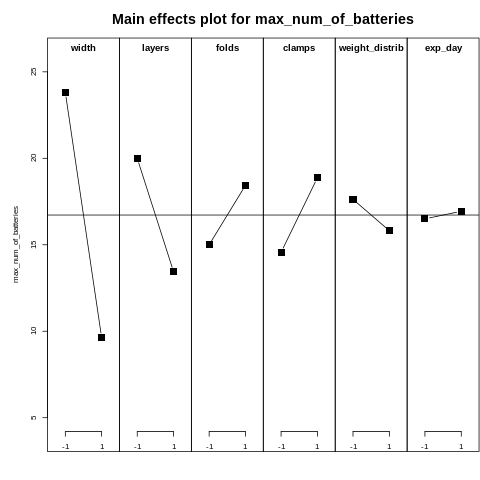

In [ ]:
%%R
MEPlot(m)

Main effects plot suggests, that factors width and layers have the biggest effect on the maximum weight.

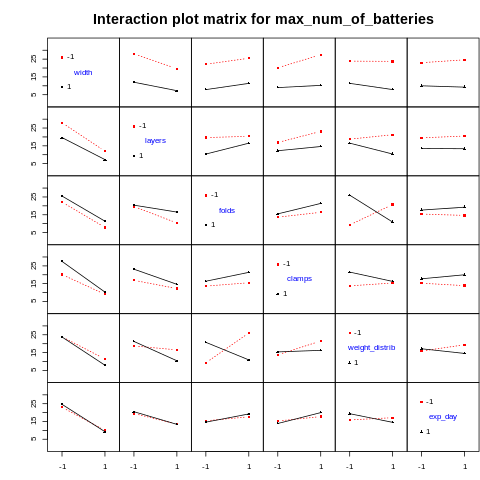

In [ ]:
%%R
IAPlot(m)

The interaction plot suggest there might be some interaction between weight distribution and all clamps, number of folds layers and experiment day. Another possible interaction suggested by the plot is between clamps and experiment day

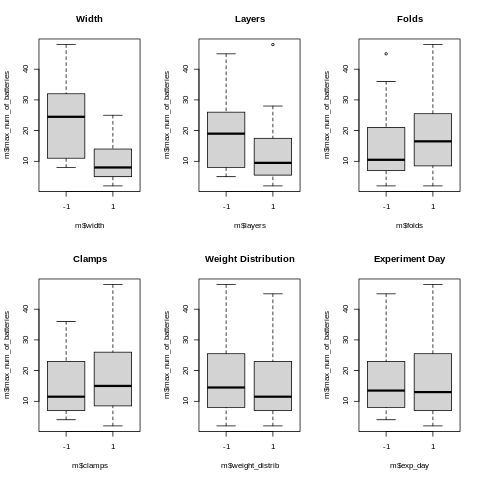

In [ ]:
%%R
par(mfrow=c(2,3))
boxplot(m$max_num_of_batteries ~ m$width, main = "Width")
boxplot(m$max_num_of_batteries ~ m$layers, main = "Layers")
boxplot(m$max_num_of_batteries ~ m$folds, main = "Folds")
boxplot(m$max_num_of_batteries ~ m$clamps, main = "Clamps")
boxplot(m$max_num_of_batteries ~ m$weight_distrib, main = "Weight Distribution")
boxplot(m$max_num_of_batteries ~ m$exp_day, main = "Experiment Day")

There appears to be a difference in the median number of batteries supported at the two levels of width. There also seems to be slight difference in the median values for the number of layers, with the higher level supporting more batteries.

# 5. Perform an analysis of variance and find a valid model for the experiment.

In [ ]:
%%R
summary(lm_full<-lm(max_num_of_batteries ~ (width+layers+folds+clamps+weight_distrib+exp_day)^2, data=m))
lm_full %>% aov %>% summary

                       Df Sum Sq Mean Sq F value   Pr(>F)    
width                   1 1610.3  1610.3  38.564 0.000100 ***
layers                  1  344.5   344.5   8.251 0.016599 *  
folds                   1   94.5    94.5   2.264 0.163333    
clamps                  1  148.8   148.8   3.563 0.088409 .  
weight_distrib          1   26.3    26.3   0.629 0.445992    
exp_day                 1    1.5     1.5   0.037 0.851969    
width:layers            1   26.3    26.3   0.629 0.445992    
width:folds             1    0.0     0.0   0.001 0.978713    
width:clamps            1   75.0    75.0   1.797 0.209747    
width:weight_distrib    1   22.8    22.8   0.546 0.477108    
width:exp_day           1   11.3    11.3   0.270 0.614529    
layers:folds            1   57.8    57.8   1.384 0.266702    
layers:clamps           1   30.0    30.0   0.719 0.416242    
layers:weight_distrib   1  148.8   148.8   3.563 0.088409 .  
layers:exp_day          1    2.5     2.5   0.061 0.810499    
folds:cl

In [ ]:
%%R
lm_reduced<-lm(max_num_of_batteries~width+layers+clamps+weight_distrib+folds+folds:weight_distrib+layers:weight_distrib,data=m)
lm_reduced %>% aov %>% summary

                      Df Sum Sq Mean Sq F value   Pr(>F)    
width                  1 1610.3  1610.3  44.345 6.90e-07 ***
layers                 1  344.5   344.5   9.488  0.00512 ** 
clamps                 1  148.8   148.8   4.097  0.05422 .  
weight_distrib         1   26.3    26.3   0.724  0.40332    
folds                  1   94.5    94.5   2.603  0.11972    
weight_distrib:folds   1 1417.8  1417.8  39.044 1.86e-06 ***
layers:weight_distrib  1  148.8   148.8   4.097  0.05422 .  
Residuals             24  871.5    36.3                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
summary(lm_reduced)


Call:
lm.default(formula = max_num_of_batteries ~ width + layers + 
    clamps + weight_distrib + folds + folds:weight_distrib + 
    layers:weight_distrib, data = m)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.2500 -3.0469 -0.7813  3.0469 13.8750 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              16.7187     1.0653  15.695 4.04e-14 ***
width1                   -7.0938     1.0653  -6.659 6.90e-07 ***
layers1                  -3.2812     1.0653  -3.080  0.00512 ** 
clamps1                   2.1563     1.0653   2.024  0.05422 .  
weight_distrib1          -0.9062     1.0653  -0.851  0.40332    
folds1                    1.7188     1.0653   1.613  0.11972    
weight_distrib1:folds1   -6.6563     1.0653  -6.249 1.86e-06 ***
layers1:weight_distrib1  -2.1563     1.0653  -2.024  0.05422 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.026 on 24 degrees of freedom
Multiple R-squ

In [ ]:
%%R
# full_model <- lm(max_num_of_batteries ~ (width + layers + folds + clamps + weight_distribution + experiment_day)^2, data=m)

# # Perform backward selection using BIC instead of AIC
# backward_model_bic <- stepAIC(full_model, direction="backward", k=log(nrow(df)))

NULL


In [ ]:
%%R
# summary(backward_model_bic)
# backward_model_bic%>% aov %>% summary

NULL


# 6. If feasible, incorporate measurements at the 'center points' of the numerical variables and analyze their effects.

In [ ]:
%%R
# Create a dataframe containing center points
df_new = df_raw[, c(2, 3, 4, 6, 7, 8, 10)]

# Define factors
df_new[, c(4, 5, 7)] = lapply(df_new[, c(4, 5, 7)], as.factor)
df_new

   width layers folds clamps weight_distrib max_num_of_batteries exp_day
1    4.5      1     5      0              0                    8       2
2    4.5      1     5      0              1                    8       1
3    4.5      1     5      1              1                    8       2
4    4.5      1     5      1              0                    4       1
5    4.5      2     5      0              1                   25       2
6    4.5      2     5      0              0                   16       1
7    4.5      2     5      1              1                   28       1
8    4.5      2     5      1              0                   13       2
9    4.5      1     3      0              1                   26       2
10   4.5      1     3      0              0                    6       1
11   4.5      1     3      1              1                   12       1
12   4.5      1     3      1              0                    2       2
13   4.5      2     3      0              1        

In [ ]:
%%R
# ANOVA
lm_center = lm(max_num_of_batteries ~ .^2, data = df_new)
lm_center %>% aov %>% summary

                       Df Sum Sq Mean Sq F value   Pr(>F)    
width                   1   26.3    26.3   1.003  0.32982    
layers                  1 1703.0  1703.0  65.006 2.19e-07 ***
folds                   1  148.8   148.8   5.679  0.02839 *  
clamps                  1  308.0   308.0  11.758  0.00299 ** 
weight_distrib          1 1918.2  1918.2  73.220 9.28e-08 ***
exp_day                 1   50.4    50.4   1.924  0.18231    
width:layers            1   94.5    94.5   3.608  0.07364 .  
width:folds             1   94.5    94.5   3.608  0.07364 .  
width:clamps            1  148.8   148.8   5.679  0.02839 *  
width:weight_distrib    1   22.8    22.8   0.870  0.36341    
width:exp_day           1    1.5     1.5   0.058  0.81170    
layers:folds            1   22.8    22.8   0.870  0.36341    
layers:clamps           1    5.6     5.6   0.215  0.64865    
layers:weight_distrib   1  126.0   126.0   4.810  0.04166 *  
layers:exp_day          1   14.0    14.0   0.535  0.47392    
folds:cl

In [ ]:
%%R
# Extract the significant effects
lm_center = lm(max_num_of_batteries ~ width + layers + folds + clamps + weight_distrib + layers:weight_distrib + width:clamps, data = df_new)
lm_center %>% aov %>% summary

                      Df Sum Sq Mean Sq F value   Pr(>F)    
width                  1   26.3    26.3   0.877  0.35611    
layers                 1 1703.0  1703.0  56.813 1.39e-08 ***
folds                  1  148.8   148.8   4.963  0.03304 *  
clamps                 1  308.0   308.0  10.276  0.00305 ** 
weight_distrib         1 1918.2  1918.2  63.992 3.93e-09 ***
layers:weight_distrib  1  126.0   126.0   4.204  0.04859 *  
width:clamps           1  148.8   148.8   4.963  0.03304 *  
Residuals             32  959.2    30.0                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Outside of `clamps`, `weight_distrib` and `exp_day` it seemed useful to consider the variables as numeric. After adding center points, the only significant effects were observed in variables `layers`, `weight_distrib`, `clamps` and `folds` provided that we are cunducting the analysis on significance level of 0.05. Interactions `width:clamps` and `layers:weight_distrib` were also recognized as significant.

# 7. Construct a regression model using the coded quantitative variables and any significant factor variables.

In [ ]:
!pip install --upgrade statsmodels

In [ ]:
# imports
import numpy as np
import scipy as scp
import statsmodels as sm
import statsmodels.api as sma
import statsmodels.formula.api as smf
import seaborn as sbn
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [ ]:
url = "https://gist.githubusercontent.com/aleksejalex/8c6f79713b6adab830b96974a9bf7aad/raw/965be061b72984f791ec8fee12a26e07d6a354ab/NAEX-bridge-CP.csv"

data = pd.read_csv(url)
data.head(5)

,height,width,layers,folds,length,clamps,weight_distrib,max_num_of_batteries,support_length,exp_day
0,3.5,4.5,1,5,24.5,0,0,8,2.5,2
1,3.5,4.5,1,5,24.5,0,1,8,2.5,1
2,3.5,4.5,1,5,24.5,1,1,8,2.5,2
3,3.5,4.5,1,5,24.5,1,0,4,2.5,1
4,3.5,4.5,2,5,24.5,0,1,25,2.5,2


In [ ]:
data.describe()

,height,width,layers,folds,length,clamps,weight_distrib,max_num_of_batteries,support_length,exp_day
count,40.0,40.000000,40.00000,40.000000,40.0,40.00000,40.00000,40.000000,40.0,40.000000
mean,3.5,5.500000,1.50000,4.000000,24.5,0.50000,0.50000,16.875000,2.5,1.400000
std,0.0,0.905822,0.50637,0.905822,0.0,0.50637,0.50637,11.699633,0.0,0.496139
min,3.5,4.500000,1.00000,3.000000,24.5,0.00000,0.00000,2.000000,2.5,1.000000
25%,3.5,4.500000,1.00000,3.000000,24.5,0.00000,0.00000,8.000000,2.5,1.000000
50%,3.5,5.500000,1.50000,4.000000,24.5,0.50000,0.50000,13.500000,2.5,1.000000
75%,3.5,6.500000,2.00000,5.000000,24.5,1.00000,1.00000,25.000000,2.5,2.000000
max,3.5,6.500000,2.00000,5.000000,24.5,1.00000,1.00000,48.000000,2.5,2.000000


In [ ]:
def factorize(df, variable_name):
    """
    this function taks dataframe and a name of var that has only 2 or 3 values.
    It sets those values to {-1, 1} for 2-valued vars and to {-1, 0, 1} for 3-valued vars.
    """
    unique_values = df[variable_name].unique()  # Check the number of unique values in the variable
    num_unique_values = len(unique_values)

    if num_unique_values == 2:
        # Assign -1 to the lower value and +1 to the higher value
        lower_value, higher_value = unique_values
        df[variable_name] = df[variable_name].apply(lambda x: -1 if x == lower_value else 1)

    elif num_unique_values == 3:
        # Assign -1 to the lowest value, 0 to the middle value, and +1 to the highest value
        sorted_values = sorted(unique_values)
        df[variable_name] = df[variable_name].apply(lambda x: sorted_values.index(x) - 1)

    else:
        print(f"The variable '{variable_name}' does not have exactly two or three unique values.")

    return df

In [ ]:
df = data.copy()
#print("Original DataFrame:")
#print(df)

df2 = factorize(df, 'folds')
df2 = factorize(df2, 'width')
df2 = factorize(df2, 'layers')
df2 = factorize(df2, 'clamps')
df2 = factorize(df2, 'weight_distrib')

#print("\nDataFrame after factorization:")
#print(df2)
data2= df2.copy()

In [ ]:
data2.drop("height", axis=1, inplace=True)
data2.drop("length", axis=1, inplace=True)
data2.drop("support_length", axis=1, inplace=True)
data2.drop("exp_day", axis=1, inplace=True)

In [ ]:
data2

,width,layers,folds,clamps,weight_distrib,max_num_of_batteries
0,-1,-1,1,-1,-1,8
1,-1,-1,1,-1,1,8
2,-1,-1,1,1,1,8
3,-1,-1,1,1,-1,4
4,-1,1,1,-1,1,25
5,-1,1,1,-1,-1,16
6,-1,1,1,1,1,28
7,-1,1,1,1,-1,13
8,-1,-1,-1,-1,1,26
9,-1,-1,-1,-1,-1,6


In [ ]:
# OLS 1
formula_temp = "max_num_of_batteries ~  width + layers + folds + clamps + weight_distrib + weight_distrib:folds + layers:weight_distrib"

# fit
model_temp = smf.ols(formula=formula_temp, data=data2).fit()
print(model_temp.summary())

                             OLS Regression Results                             
Dep. Variable:     max_num_of_batteries   R-squared:                       0.806
Model:                              OLS   Adj. R-squared:                  0.764
Method:                   Least Squares   F-statistic:                     19.05
Date:                  Mon, 04 Dec 2023   Prob (F-statistic):           9.32e-10
Time:                          21:41:45   Log-Likelihood:                -121.78
No. Observations:                    40   AIC:                             259.6
Df Residuals:                        32   BIC:                             273.1
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept 

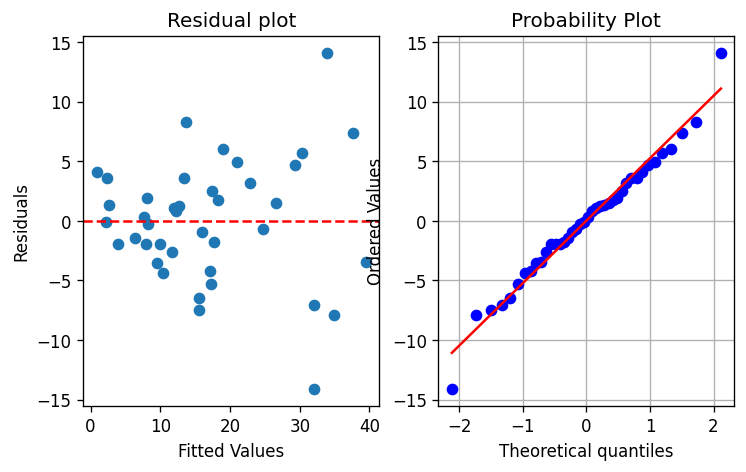

In [ ]:
plt.figure(figsize=(7,4), dpi=120)
plt.subplot(1,2,1)
plt.scatter(model_temp.fittedvalues, model_temp.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title("Residual plot")
plt.axhline(y=0, color='r', linestyle='--')
ax = plt.subplot(1,2,2)
stats.probplot(model_temp.resid, dist="norm", plot = ax)
plt.grid()

plt.savefig("residuals_of_OLS.png", dpi=300)
plt.show()

In [ ]:
# White test (for heteroscedasticity)
from statsmodels.stats.diagnostic import het_white

print(f"H0: variance of error in OLS model is constant.")
white_test_statistic, white_p_value, _, _ = het_white(model_temp.resid, model_temp.model.exog)
print(f'White Test Statistic: {white_test_statistic}, p-value: {white_p_value}')

alpha = 0.01  # significance level
if white_p_value < alpha:
    # we dont have enough evidence to accept H_0
    print("Reject H_0 (Have to accept H_1). ")
else:
    # significant evidence to reject H_0, i.e. to accept H_1
    print("Can't reject H_0 (Have to accept H_0). ")

H0: variance of error in OLS model is constant.
White Test Statistic: 35.055735285612016, p-value: 0.03822867049836392
Can't reject H_0 (Have to accept H_0). 


In [ ]:
# Normality of residuals - Shapiro-Wilk test
#  (can be important especially in case small sample size)
print(f"H0: sample (residuals) came from normal distribution.")
from scipy.stats import shapiro
stat, p_value = shapiro(model_temp.resid)
print(f'Shapiro-Wilk Test: Statistic={stat}, p-value={p_value}')

alpha = 0.05  # significance level
if p_value < alpha:
    # we dont have enough evidence to accept H_0
    print("Reject H_0 (Have to accept H_1). ")
else:
    # significant evidence to reject H_0, i.e. to accept H_1
    print("Can't reject H_0 (Have to accept H_0). ")

H0: sample (residuals) came from normal distribution.
Shapiro-Wilk Test: Statistic=0.9857189059257507, p-value=0.8855799436569214
Can't reject H_0 (Have to accept H_0). 


In [ ]:
# VIF
# =is a measure that quantifies the extent of multicollinearity in a set of predictor variables within a regression model.
# Multicollinearity occurs when two or more independent variables in a model are highly correlated,
# making it difficult to isolate the individual effect of each variable on the dependent variable.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = data2.columns
vif["VIF"] = [variance_inflation_factor(data2.values, i) for i in range(data2.shape[1])]
#print(vif)
vif

,Variable,VIF
0,width,1.002082
1,layers,1.134897
2,folds,1.011785
3,clamps,1.024399
4,weight_distrib,1.151943
5,max_num_of_batteries,1.325105


In [ ]:
"""=> we see almost no or very slight correlation between vars used in our model. """

'=> we see almost no or very slight correlation between vars used in our model. '

In [ ]:
import pickle

with open('statsmodels_ols_model.pkl', 'wb') as f:
    pickle.dump(model_temp, f)

In [ ]:
%%R
#if (!requireNamespace("reticulate", quietly = TRUE)) install.packages("reticulate")
#library(reticulate)
model <- reticulate::py_load_object("statsmodels_ols_model.pkl")

In [ ]:
%%R
# Access coefficients
coefficients <- reticulate::py_get_attr(model, "params")
print(coefficients)

Intercept                16.87500
width                    -0.90625
layers                    6.52500
folds                    -2.15625
clamps                   -2.77500
weight_distrib            6.92500
weight_distrib:folds     -1.53125
layers:weight_distrib     1.77500
dtype: float64


In [ ]:
%%R
coefficients <- reticulate::py_get_attr(model, "params")
std_errors <- reticulate::py_get_attr(model, "bse")
t_values <- reticulate::py_get_attr(model, "tvalues")
p_values <- reticulate::py_get_attr(model, "pvalues")

In [ ]:
%%R
coefficients

Intercept                16.87500
width                    -0.90625
layers                    6.52500
folds                    -2.15625
clamps                   -2.77500
weight_distrib            6.92500
weight_distrib:folds     -1.53125
layers:weight_distrib     1.77500
dtype: float64


In [ ]:
%%R
coefficients$width

[1] -0.90625


# 8. For two chosen numerical variables, create a contour plot to find the optimal values for maximizing bridge strength under the additional condition of 3 layers, minimal width 6cm and minimal length of 22 cm.

In [ ]:
%%R
data8 <- df %>% transmute(width = as.numeric(width),
                          layers = as.numeric(layers),
                          folds = as.numeric(folds),
                          clamps = as.factor(clamps),
                          weight_distrib = as.factor(weight_distrib),
                          exp_day = as.factor(exp_day),
                          max_num_of_batteries = as.numeric(max_num_of_batteries))

head(data8)

  width layers folds clamps weight_distrib exp_day max_num_of_batteries
1   4.5      1     5      0              0       2                    8
2   4.5      1     5      0              1       1                    8
3   4.5      1     5      1              1       2                    8
4   4.5      1     5      1              0       1                    4
5   4.5      2     5      0              1       2                   25
6   4.5      2     5      0              0       1                   16


In [ ]:
%%R
ctrlm<-lm(max_num_of_batteries~width*layers, data=data8)
summary(ctrlm)


Call:
lm.default(formula = max_num_of_batteries ~ width * layers, data = data8)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.750  -6.219  -1.562   2.875  24.250 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)   -26.625     33.008  -0.807    0.427
width           4.250      5.905   0.720    0.478
layers         32.219     20.876   1.543    0.134
width:layers   -3.437      3.734  -0.920    0.365

Residual standard error: 10.56 on 28 degrees of freedom
Multiple R-squared:   0.33,	Adjusted R-squared:  0.2582 
F-statistic: 4.597 on 3 and 28 DF,  p-value: 0.009731



In [ ]:
%%R
rg <- list(width=seq(3.5,7.5,by=.05),layers=seq(1,5,by=1),data=data8)
new8 <- expand.grid(rg)
new8$max_num_of_batteries <- predict(ctrlm,new8)

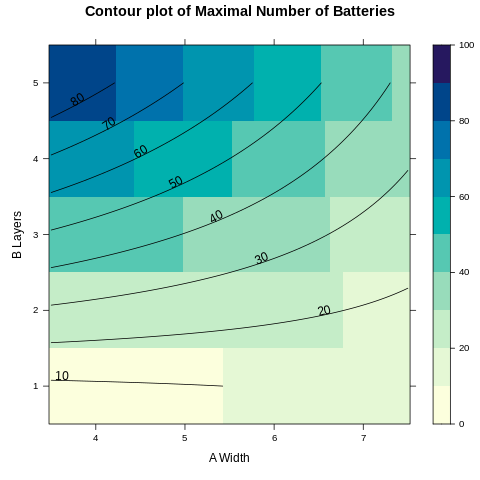

In [ ]:
%%R
contourplot(max_num_of_batteries ~ width*layers, new8, region = TRUE, xlab="A Width",ylab="B Layers",main="Contour plot of Maximal Number of Batteries")
#points(, col="red", pch=17)


The contour plot was constructed for continuous variables width an layers affecting maximal number of batteries. We can notice, that for a width 6cm and 3 layers of paper is a weight capacity of a bridge in region around 50 batteries. Our Bridge constructors did not change the length of a bridge, so that condition is omitted.

In [ ]:
%%R
#install.packages("rsm")
#library("rsm")

NULL


In [ ]:
%%R
#install.packages("pid")
#library("pid")

NULL


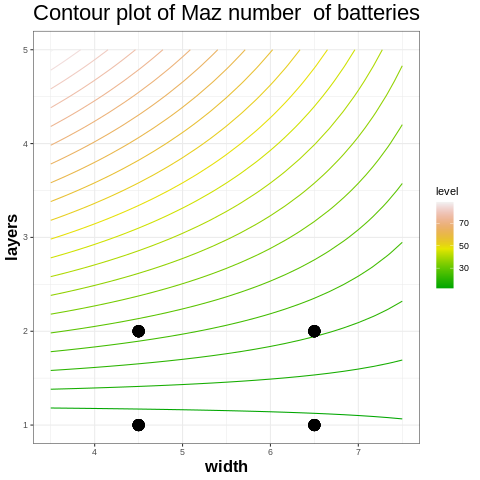

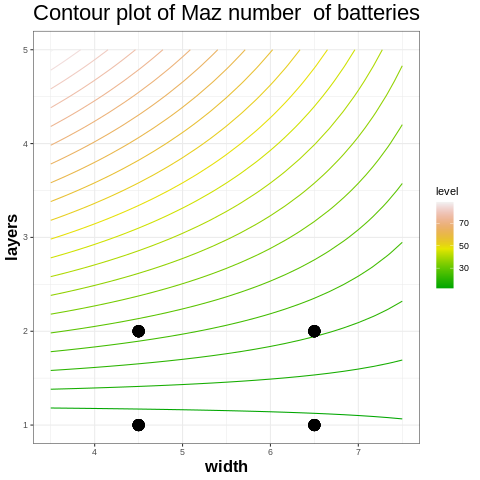

In [ ]:
%%R
contourPlot(ctrlm,
            xlab="width",ylab="layers",
            main="Contour plot of Maz number  of batteries",
            xlim=c(3.5, 7.5),
            ylim=c(1, 5),
            colour.function=terrain.colors)

In [ ]:
%%R
rsm_bt<-rsm(max_num_of_batteries~FO(width,layers)+TWI(width,layers), data=new8)

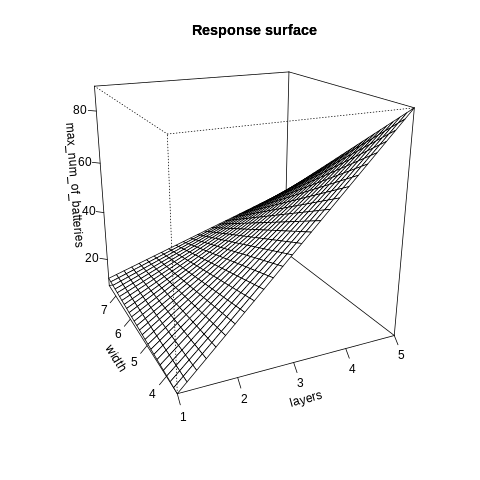

In [ ]:
%%R
persp(rsm_bt, width~layers, zlab = "max_num_of_batteries", main="Response surface")